In [12]:
from ultralytics import YOLO
import torch

model = YOLO("runs/detect/plate_model9/weights/best.pt")  # load a custom model

In [19]:
results = model('images/testpng.png')
results
results[0].show()  # show results


image 1/1 /home/nhat/Documents/graduate/code/Yolo/images/testpng.png: 480x640 1 License-Plates, 24.8ms
Speed: 9.5ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
model.train(data = 'dataset/data.yaml', epochs = 30, imgsz = 640, batch = 4, name = 'plate_model')

New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.100 🚀 Python-3.10.16 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 3904MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.pt, data=dataset/data.yaml, epochs=30, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=plate_model9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

train: Scanning /home/nhat/Documents/graduate/code/Yolo/dataset/train/labels.cache... 470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 470/470 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 498. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/nhat/Documents/graduate/code/Yolo/dataset/valid/labels.cache... 134 images, 0 backgrounds, 0 corrupt: 100%|██████████| 134/134 [00:00<?, ?it/s]


Plotting labels to runs/detect/plate_model9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/plate_model9
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.19G      2.075      3.616      2.039          3        640: 100%|██████████| 118/118 [00:49<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.81it/s]

                   all        134        141      0.811      0.745      0.794      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.23G      1.339      1.951      1.281          3        640: 100%|██████████| 118/118 [00:49<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        134        141      0.897      0.743      0.841      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.27G      1.365      1.635      1.264          6        640: 100%|██████████| 118/118 [00:49<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]

                   all        134        141      0.844      0.766      0.776      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.27G       1.29      1.373      1.242          1        640: 100%|██████████| 118/118 [00:49<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.907      0.766      0.848      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.27G      1.272       1.19      1.231          1        640: 100%|██████████| 118/118 [00:49<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        134        141      0.864      0.809      0.858      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       3.3G      1.262      1.071       1.22          3        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141      0.894      0.844       0.89      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.34G      1.214      1.075      1.228          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141       0.91      0.809      0.902      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.38G       1.13     0.9742      1.167          3        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.901      0.809      0.887      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.38G      1.224     0.9058      1.204          5        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.947      0.851      0.887      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.38G      1.169     0.8295      1.152          3        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.908      0.823      0.897      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.38G      1.132     0.8086      1.116          3        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141       0.91      0.865      0.905      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.38G       1.11     0.8189      1.149          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        134        141      0.936      0.827      0.912      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.38G      1.134     0.7728       1.14          5        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141      0.925       0.88      0.919      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.38G       1.13      0.786       1.13          4        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.894      0.816       0.88       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.38G      1.077     0.7171      1.132          5        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.954      0.851       0.91      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.38G      1.078     0.7164      1.109          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141      0.909      0.849      0.902      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.38G      1.046     0.6763      1.087          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141       0.94      0.844      0.928      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.38G       1.06     0.6858      1.117          4        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141      0.925      0.901      0.942      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.38G      1.072     0.6456      1.099          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.934      0.894      0.936       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.38G      1.066      0.636      1.099          3        640: 100%|██████████| 118/118 [00:49<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.926      0.858      0.923      0.616


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.38G     0.9611     0.5456      1.083          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.939      0.876      0.939      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.38G     0.9595     0.5251      1.075          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.903      0.887      0.933      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.38G     0.9253     0.5193      1.072          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        134        141      0.945      0.865      0.924      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.38G     0.9499     0.5126      1.071          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.936      0.894      0.927      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.38G     0.9175     0.4971      1.044          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.937      0.887      0.942      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.38G     0.9121     0.4735      1.058          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.934      0.909      0.943      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.38G     0.8962     0.4673      1.055          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        134        141      0.946      0.901      0.934      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.38G     0.8653     0.4604      1.029          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141       0.94      0.908       0.94      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.38G     0.8739     0.4413      1.036          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        134        141      0.938      0.915      0.937      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.38G     0.8609     0.4304      1.018          2        640: 100%|██████████| 118/118 [00:49<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        134        141      0.938      0.908      0.939      0.659



30 epochs completed in 0.456 hours.
Optimizer stripped from runs/detect/plate_model9/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/plate_model9/weights/best.pt, 18.9MB

Validating runs/detect/plate_model9/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.10.16 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 3904MiB)
YOLOv12s summary (fused): 159 layers, 9,231,267 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


                   all        134        141      0.934      0.909      0.943      0.665
Speed: 0.4ms preprocess, 28.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/plate_model9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77c0cc17aef0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
plate_model = YOLO("runs/detect/plate_model9/weights/best.pt")


image 1/1 /home/nhat/Documents/graduate/code/Yolo/images/test.jpg: 480x640 1 License-Plates, 25.4ms
Speed: 1.4ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


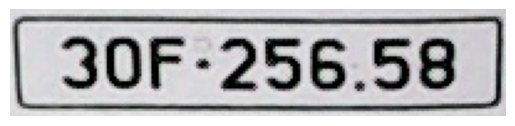

True

In [15]:
results = plate_model('images/test.jpg')
results
# results[0].show()  # show results

#get the bounding box coordinates
boxes = results[0].boxes

# Print the bounding box coordinates
# for box in boxes:
#     print(f"Bounding box coordinates: {box.xyxy[0]}")  # xyxy format
#     print(f"Confidence: {box.conf[0]}")
#     print(f"Class: {box.cls[0]}")
#     print(f"Mask: {box.mask[0]}")
#     print(f"Keypoints: {box.keypoints[0]}")
#     print(f"Segmentation: {box.segmentation[0]}")

# cut the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cut_image(image, box):
    # Get the bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    
    # Cut the image using the bounding box coordinates
    cut_img = image[y1:y2, x1:x2]
    
    return cut_img
# Load the image
image = cv2.imread('images/test.jpg')
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Get the first bounding box
box = boxes[0]
# Cut the image
cut_img = cut_image(image, box)
# Display the cut image
plt.imshow(cut_img)
plt.axis('off')
plt.show()

# Save the cut image
cv2.imwrite('plate_images/test.jpg', cv2.cvtColor(cut_img, cv2.COLOR_RGB2BGR))

[2025/05/13 14:02:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/nhat/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/nhat/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_n

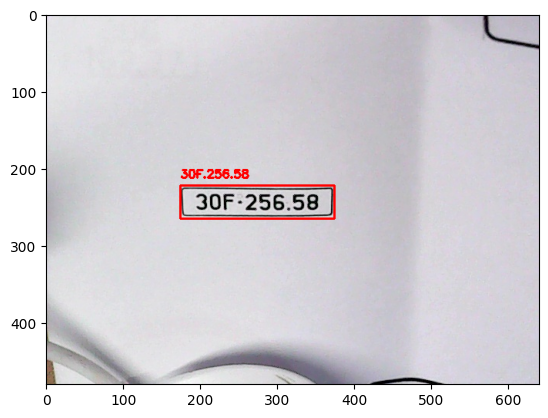

In [16]:
# %pip install paddleocr
# %pip install paddlepaddle

import cv2
import numpy as np
from matplotlib import pyplot as plt

from paddleocr import PaddleOCR
ocr = PaddleOCR(lang = 'vi')
image = cv2.imread('plate_images/test.jpg')
res = ocr.ocr(image)

#show res
for line in res:
    print(line)

# Print the text
for line in res:
    for word_info in line:
        print(word_info[1][0])  # Print the text

#draw the text on the uncut image
def draw_text(image, text, box):
    # Get the bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    
    # Draw the text on the image
    cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    #draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image
# Load the image
image = cv2.imread('images/test.jpg')
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Get the first bounding box
box = boxes[0]
# Get the text
text = res[0][0][1][0]
# Draw the text on the image
image = draw_text(image, text, box)
# Display the image
plt.imshow(image)